## PREDICTION OF SYRIATEL COMPANY CUSTOMER CHURN

##### Author: Nelson Kibet kemboi

## Business Understanding 

Due to increased competition in telecommunication industry there as been concerns on predicting the customer churn in order to retain customers. In order to maintain competitive parity by SyriaTel company customer retention is a key to the business. Since retaining customers will be cheaper than acquiring new ones it is therefore paramount to deduce ways of making sure customers are not lost by the SyriaTel company. By analyzing various data points and using predictive analytics, SyriaTel company will identify patterns and indicators that help them anticipate customer behavior and take proactive measures to reduce churn rates. Therefore SyriaTel is seeking to models that will predict whether customers are likely to churn or not hence taking a proactive measures to retain them.data on demographics like location and usage patterns like calls, charge etc will be used to analyze and build predictive machine learning models, hence SeriaTel must continuously adapt its models to reflect changing customer behavior and market dynamics to ensure its retention strategies remain effective.
 
### Objectives 
* Create machine learning models that can predict customer churn by using data to analyze customer features.
* Comparing the build machine learning models and determine the most accurate model in prediction.  
* The analysis aims to identify the specific features that have a significant impact on the customer churn rate in SyriaTel, provide valuable recommendations based on the findings hence help to mitigate churn rates in the company and improve customer retention. 


## Data Understanding 
This helps to us to acquire knowledge and comprehension about this dataset before further analysis and modeling.

In [1]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading the csv file to read and check the data 
seriatel_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
seriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking the shape of the data
seriatel_df.shape

(3333, 21)

In [4]:
# checking for data information 
seriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* It can be seen that the columns of phone number and account length are not important for this analysis hence we drop them 
* There are categorical and numerical columns in the dataset



In [5]:
#dropping irrelevant columns 
seriatel_df= seriatel_df.drop(columns= ['phone number', 'account length'], axis=1)
seriatel_df.head()

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#separating categorical and numerical colums for easier analysis 
numerical_df = seriatel_df[['area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_df = seriatel_df[['state', 'churn', 'international plan', 'voice mail plan']]

#### Checking for duplicates and NaN values

In [7]:
#checking for missing values 
seriatel_df.isna().sum()

state                     0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
#checking for duplicates 
seriatel_df.duplicated().value_counts()

False    3333
dtype: int64

As seen from the checklist above we have no mising values, nor duplicates hence the data is clean for further analysis

### Exploratory Data Analysis

In [9]:
# getting basic statistics of our dataset 
seriatel_df.describe()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* From the basic statistics we can gain initial insights into the data's distribution, central tendency, and variability. 

### Visualization of relationships in columns

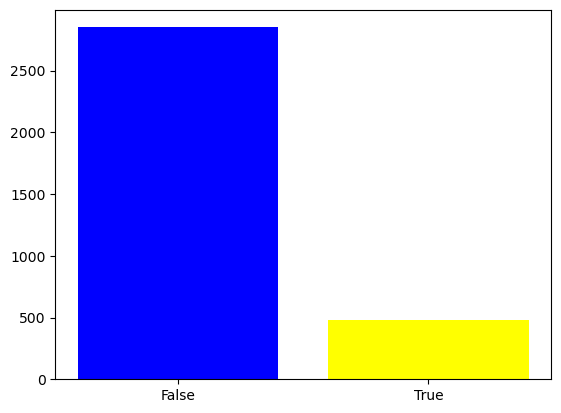

In [10]:
#checking the percentage of loyal customers using visual 
churn_counts = seriatel_df['churn'].replace({0: 'False', 1: 'True'}).value_counts()

# Plot the bar chart with the correct labels
plt.bar(['False', 'True'], churn_counts.values, color=['blue', 'yellow'], tick_label=['False', 'True'])
plt.show()


* It can be seen that most of the customers are not loyal to the Serialtel company

In [11]:
# determining the total calls made by state
seriatel_df['total_calls'] = seriatel_df['total day calls'] + seriatel_df['total eve calls'] + seriatel_df['total night calls'] + seriatel_df['total intl calls']
seriatel_df.groupby('state')['total_calls'].sum().sort_values(ascending=False)

state
WV    32523
MN    25807
NY    25092
AL    24070
OH    24060
WY    23751
OR    23497
VA    23483
WI    23463
ID    22722
MI    22657
CT    22492
VT    22146
TX    22144
IN    22096
UT    21761
KS    21426
NC    21172
NJ    20970
MD    20868
MT    20377
WA    20084
NV    20023
MS    19911
FL    19797
AZ    19671
MA    19602
RI    19525
CO    19434
ND    19394
MO    19348
NM    19278
ME    19075
OK    18930
NE    18718
SC    18397
DE    18392
KY    17971
IL    17752
SD    17517
GA    17087
AR    16705
NH    16585
DC    16401
HI    16188
TN    16102
LA    15523
AK    15288
PA    13637
IA    13528
CA    10582
Name: total_calls, dtype: int64

<AxesSubplot:xlabel='state'>

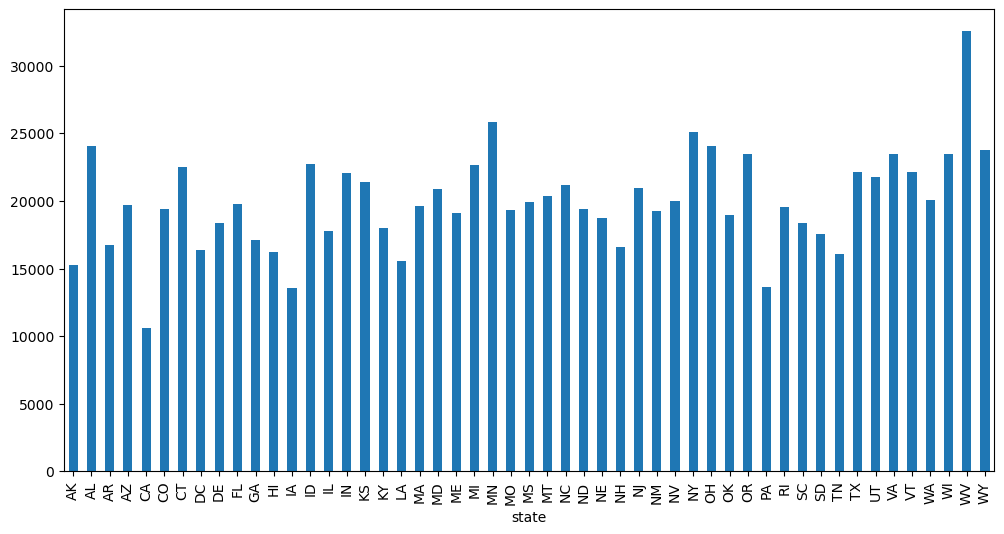

In [12]:
#visualizing the total calls per state 
seriatel_df.groupby('state')['total_calls'].sum().plot(kind='bar', figsize=(12,6), rot=90)

* Most states from the chart above shows more than `15,000` in avegage calls made. 
* `WV` which is west virginia is the state leading in making calls with `32523.` 
* The state with least total calls is `CA` which is California with `10582` calls.


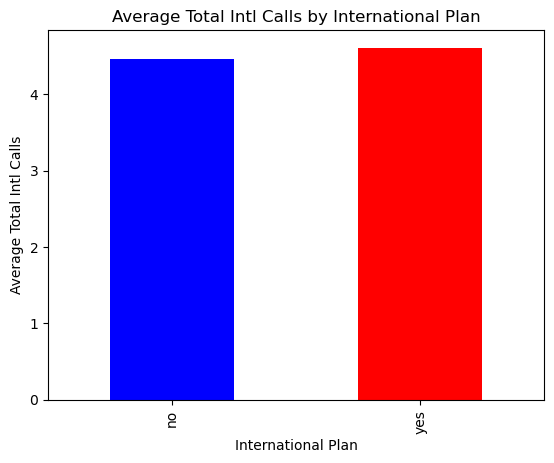

In [13]:
#visualizing for the international calls made by people 
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = seriatel_df.groupby('international plan')['total intl calls'].mean()

# Plot the bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', color=['blue', 'red'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan')

# Display the plot
plt.show()



* From the bar graph above it can be seen that there is no much different by people who make international calls in terms of getting international plan.
* In average there almost same number of people getting international plan from the most international calls and from the ones who do not make oftenly. 

<AxesSubplot:xlabel='count', ylabel='customer service calls'>

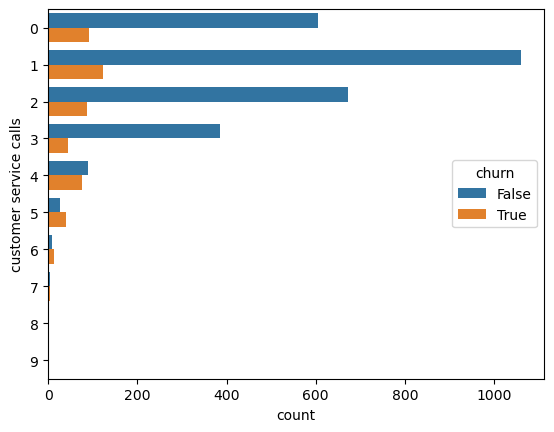

In [14]:
#visualizing the relationship between the number of calls to the call center and loyalty

sns.countplot(y='customer service calls', hue='churn', data=seriatel_df) #using searbon to plot the countplot

The chart above depicts the relationship between the number of calls to the call center and loyalty. The chart shows that there is no much relationship betwen calls and loyalty as most people making the calls are not loyal to Syriatel hence having high probalility of switching 

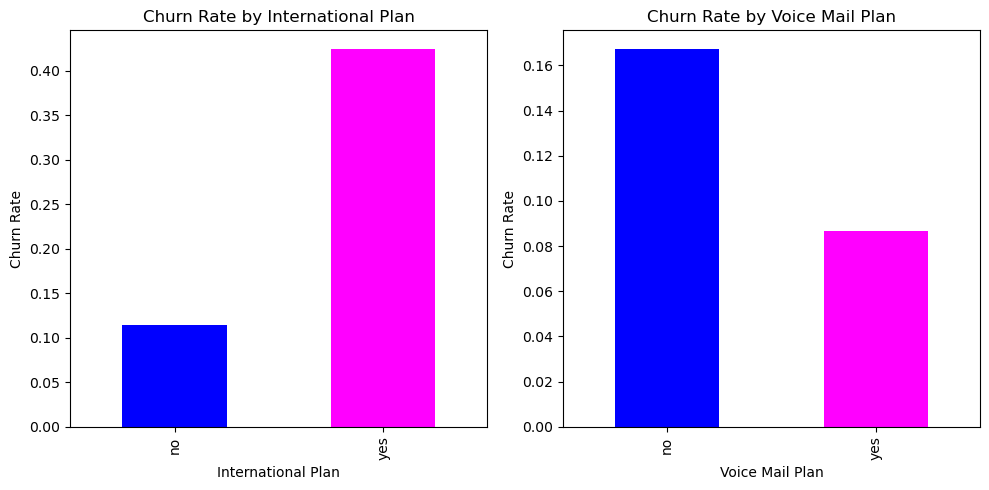

In [15]:
#visualizing for the international calls made by people 
# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot: International Plan
seriatel_df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'magenta'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
seriatel_df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'magenta'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



* Looking at the graph above shows that there is more customers loyalty by international plan subscribers.  
* Customers have higher rate of churna and higher probabiliy to churn in terms of voice mail plan.  
* This shows that customers are more happy with international plan than voice mail plan.   

### Outliers 

In [ ]:
#writing a function to check for outliers 
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [ ]:
detect_outliers(numerical_df).sum()

area code                    0.00
number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [ ]:
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

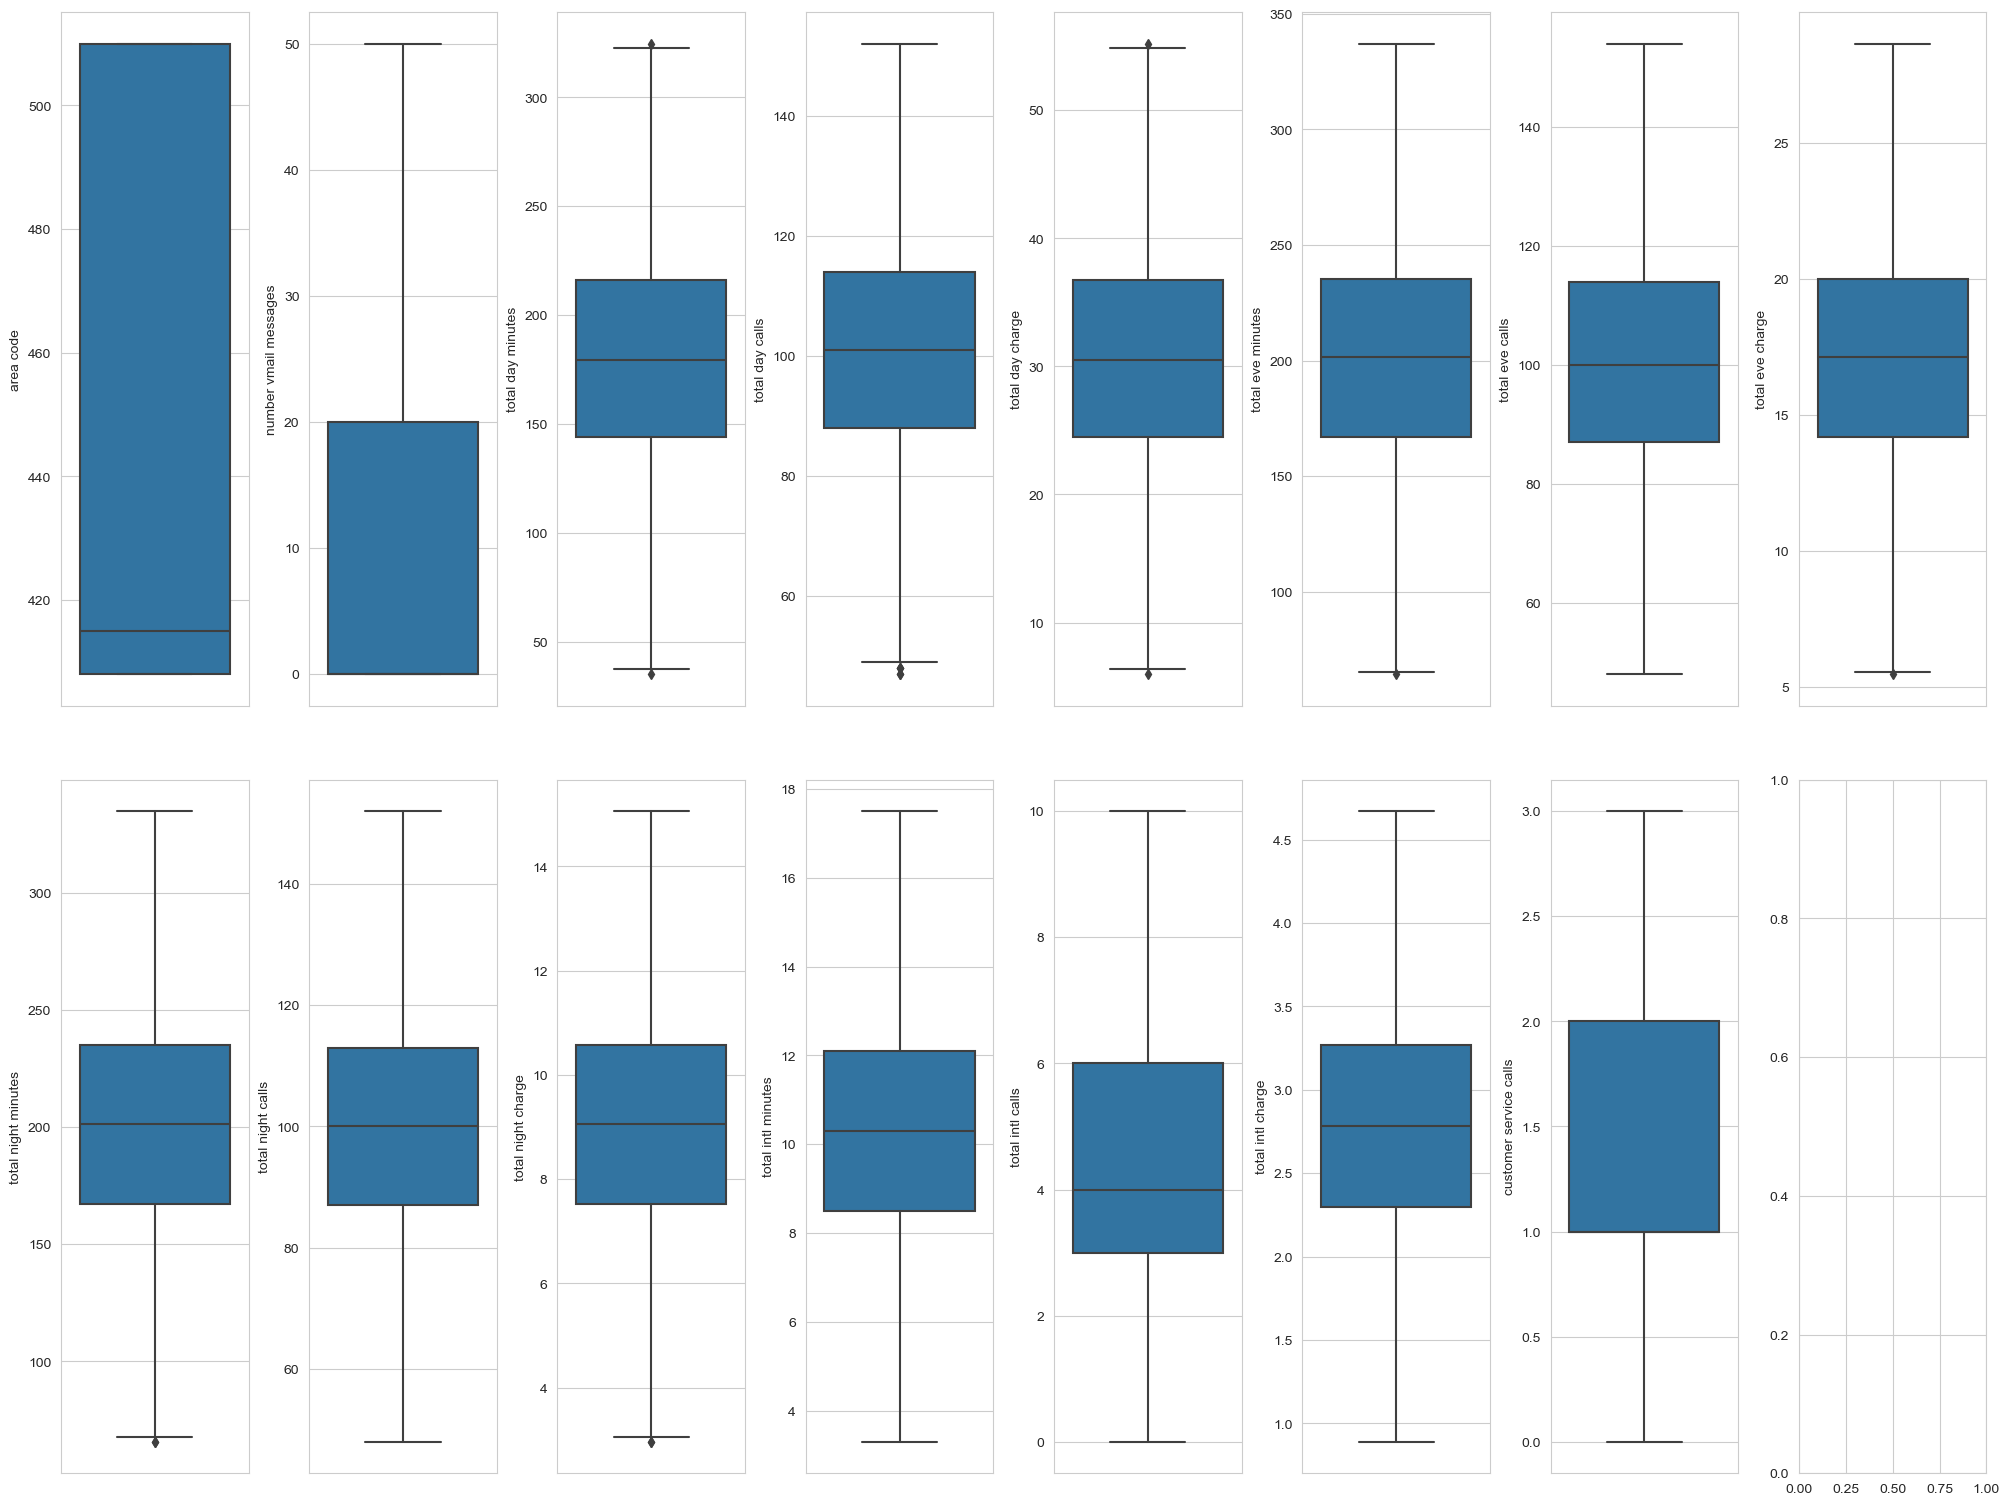

In [ ]:
#checking for any outliers in the dataset using box plot 
# visualizing with matplotlib and seaborn 
sns.set_style('whitegrid')
fig,ax = plt.subplots(ncols=8,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

In [ ]:
seriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

1. International and voice call plan

In [ ]:
# using the fucntion above to convert churn to numeric 
transform('churn')

### selecting most important feactures for our modelling 

In [ ]:
#we will drop colums that we will not use in our modelling 
seriatel_df = seriatel_df.drop(columns= ['area code', 'phone number', 'state', 'churn'], axis=1)

In [ ]:
seriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

Since we have remained with only numerical data useful for our modelling it is therefore important to check their correlation 

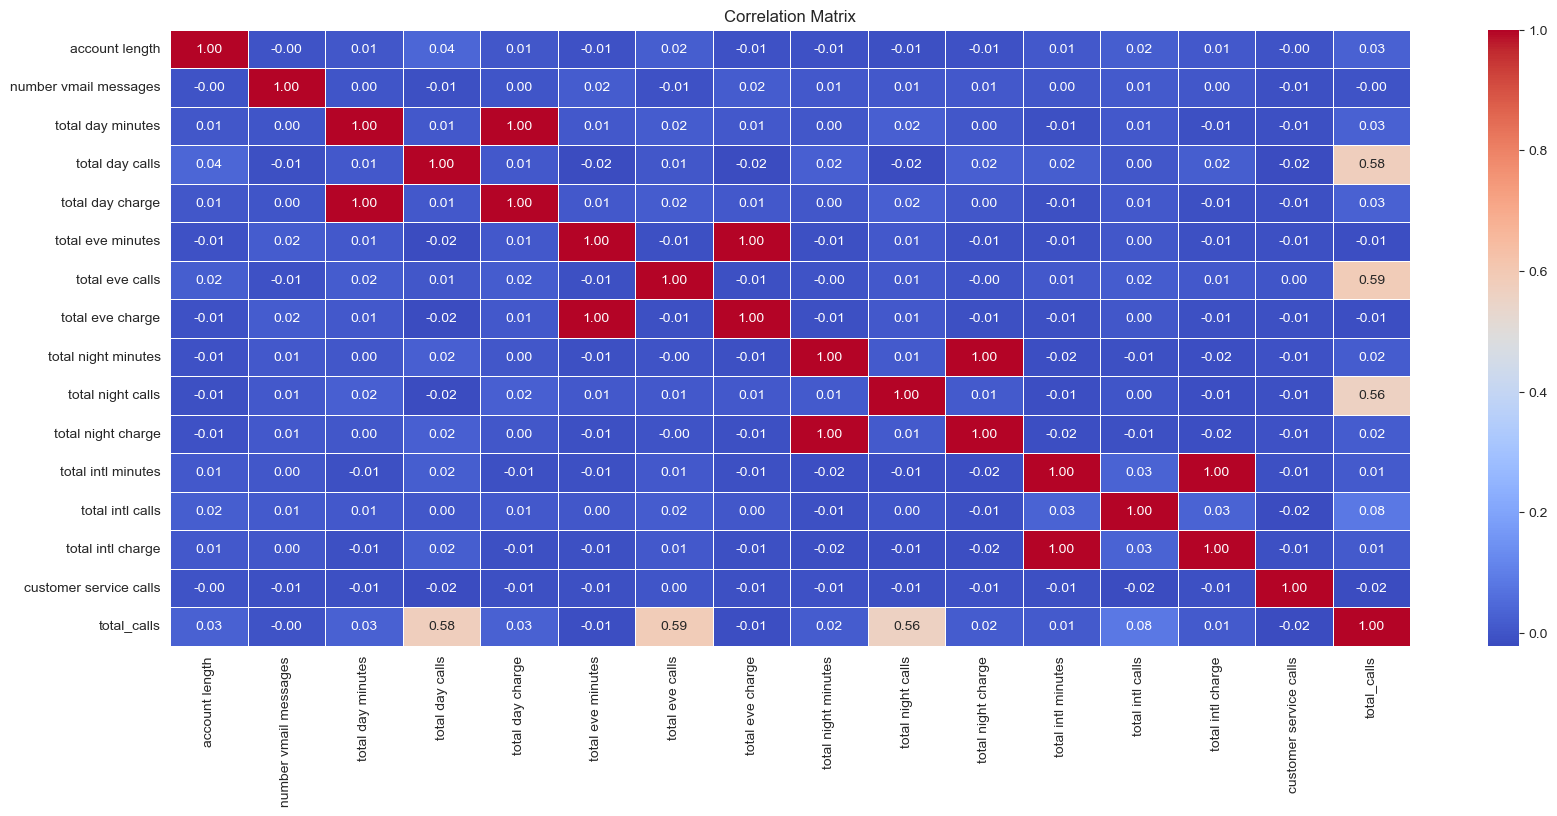

In [ ]:
#using heatmap to check for correlation 
correlation_matrix = seriatel_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
